In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Define your class names
class_names = ["rust", "healthy", "powdery", "Peach_leaf_curl","Wilting" ,"Crown_Gall_disease" , "Bacterial_Infections"]

# Loop through each class and print the number of images in each set
for class_name in class_names:
    train_files_path = f"Database/Train/{class_name}"
    test_files_path = f"Database/Test/{class_name}"
    valid_files_path = f"Database/Validation/{class_name}"

    print(f"Number of {class_name} leaf images in training set:", total_files(train_files_path))
    print(f"Number of {class_name} leaf images in test set:", total_files(test_files_path))
    print(f"Number of {class_name} leaf images in validation set:", total_files(valid_files_path))
    print("========================================================")


Number of rust leaf images in training set: 434
Number of rust leaf images in test set: 50
Number of rust leaf images in validation set: 20
Number of healthy leaf images in training set: 458
Number of healthy leaf images in test set: 50
Number of healthy leaf images in validation set: 20
Number of powdery leaf images in training set: 430
Number of powdery leaf images in test set: 50
Number of powdery leaf images in validation set: 20
Number of Peach_leaf_curl leaf images in training set: 208
Number of Peach_leaf_curl leaf images in test set: 11
Number of Peach_leaf_curl leaf images in validation set: 11
Number of Wilting leaf images in training set: 143
Number of Wilting leaf images in test set: 17
Number of Wilting leaf images in validation set: 17
Number of Gall_disease leaf images in training set: 128
Number of Gall_disease leaf images in test set: 17
Number of Gall_disease leaf images in validation set: 17
Number of Bacterial_Infections leaf images in training set: 165
Number of Ba

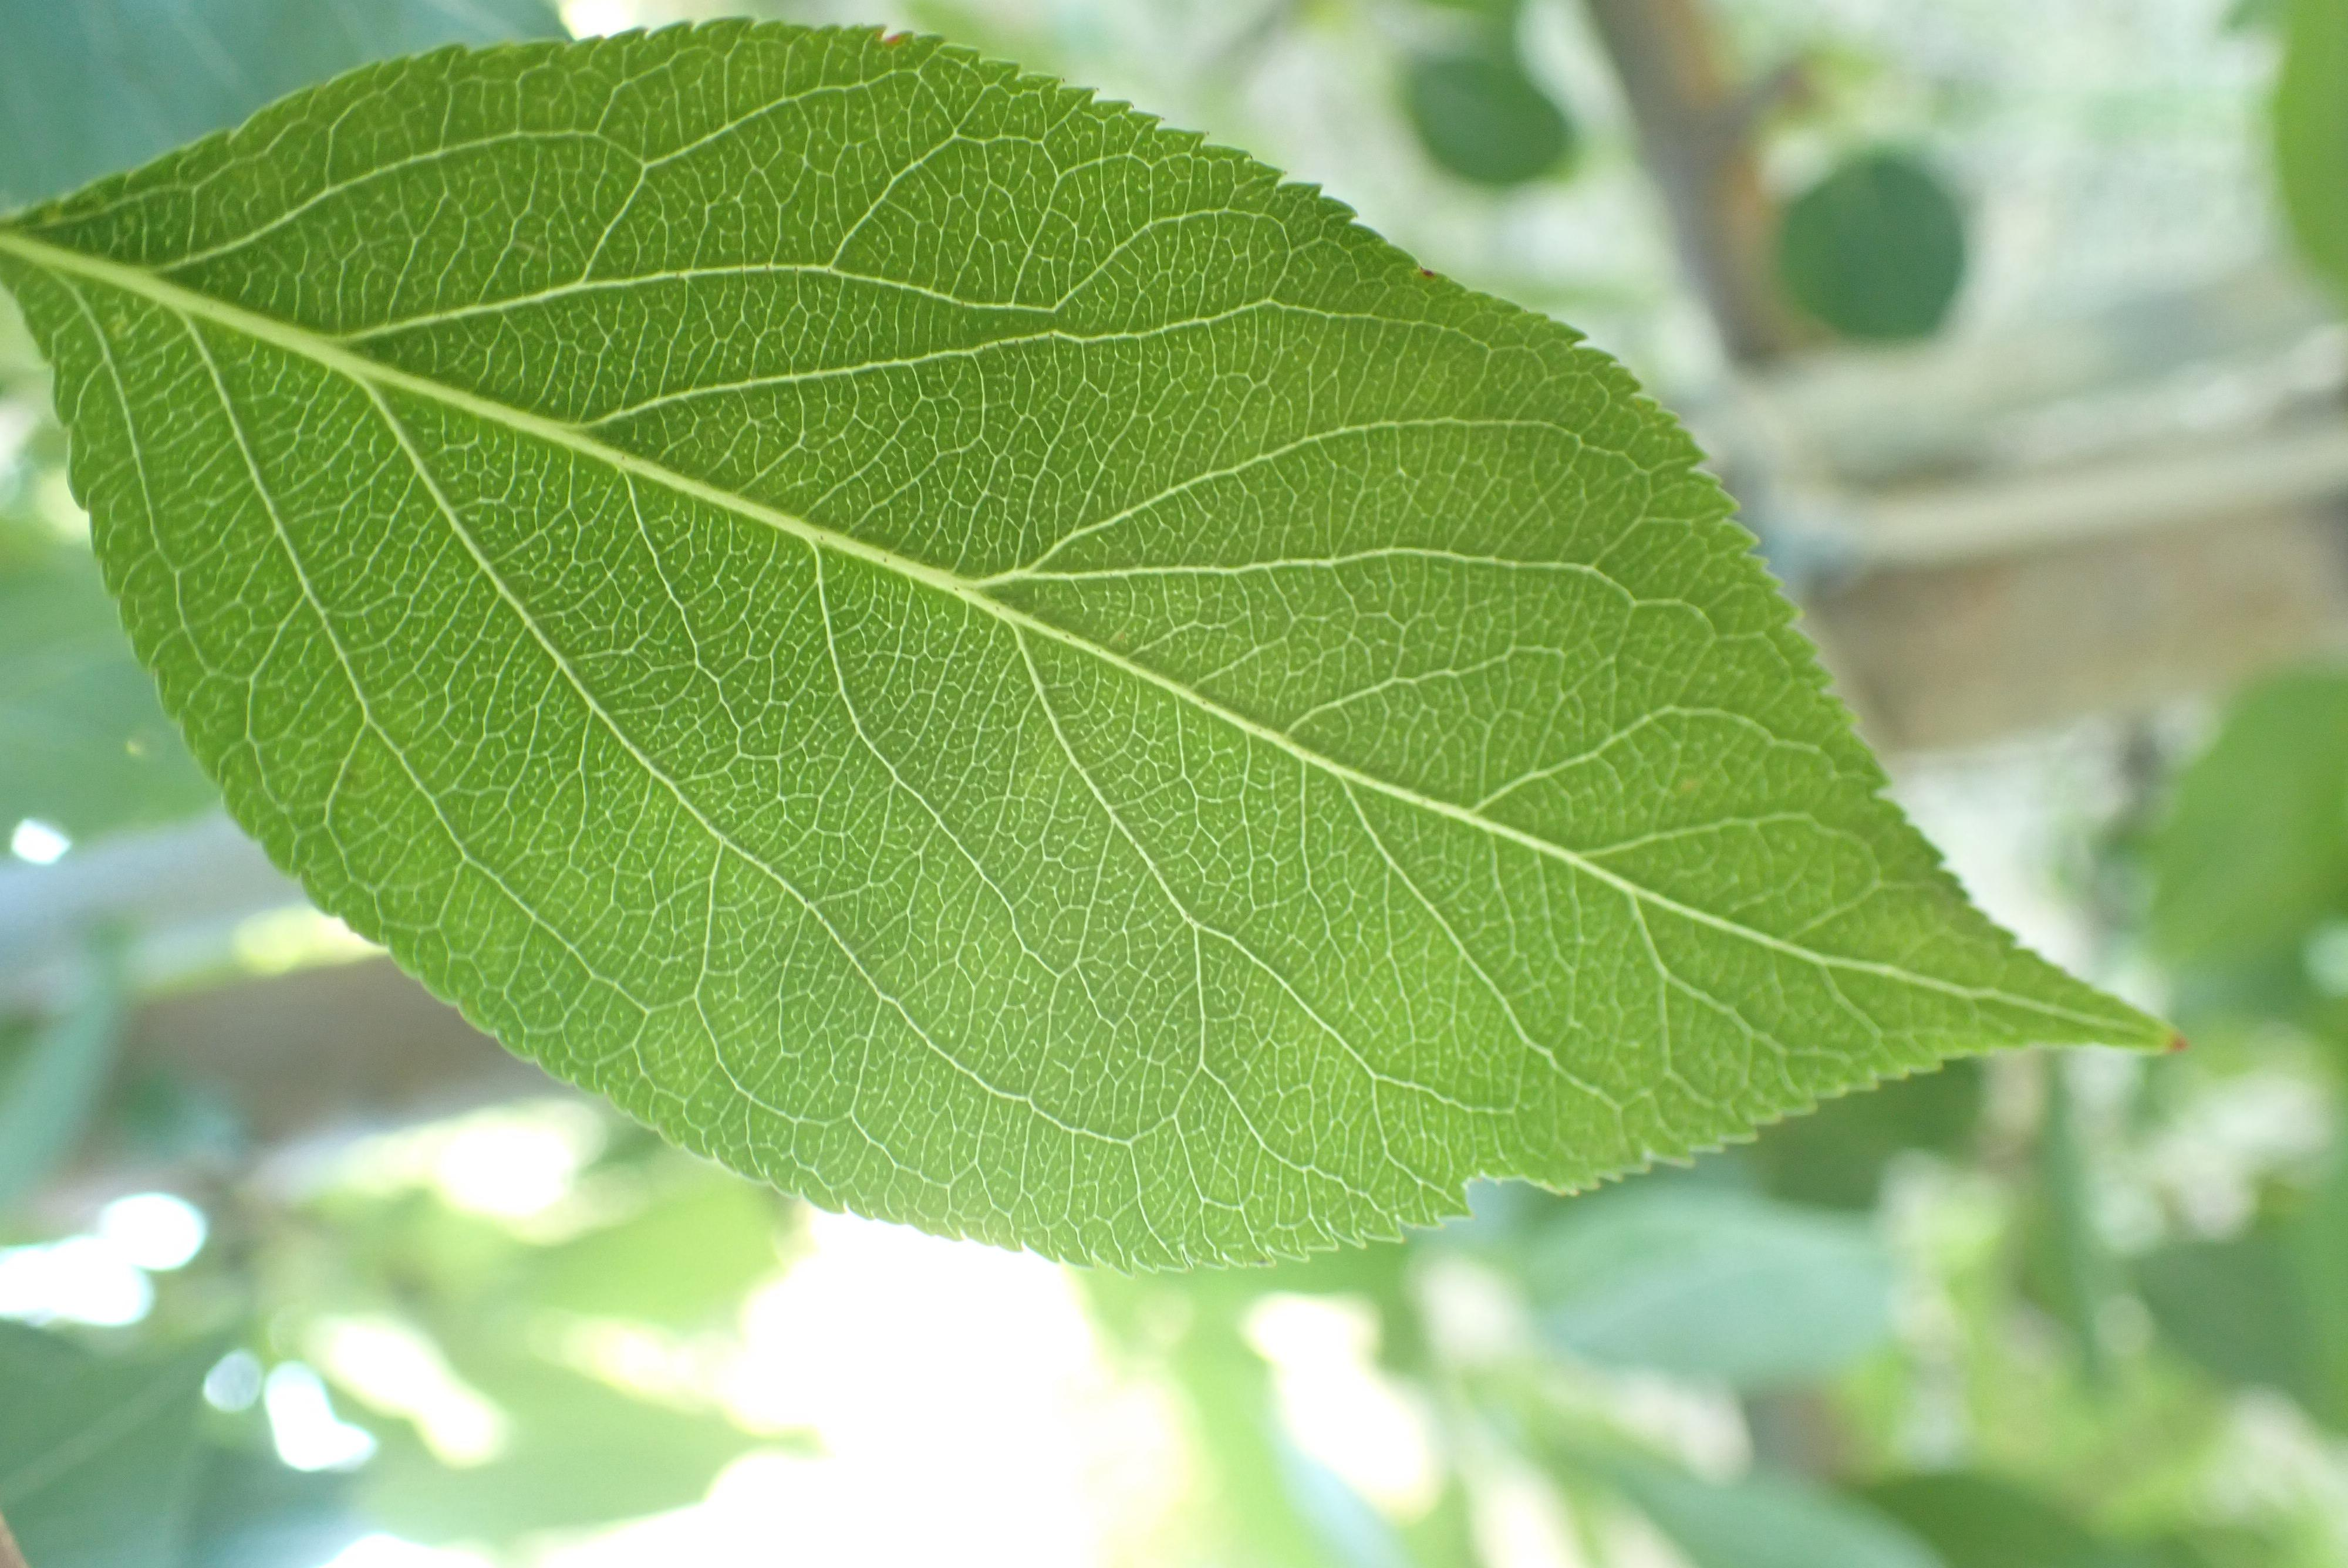

In [4]:
from PIL import Image
import IPython.display as display

image_path = 'database/Train/Healthy/8d3d8239cdcd08f5.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

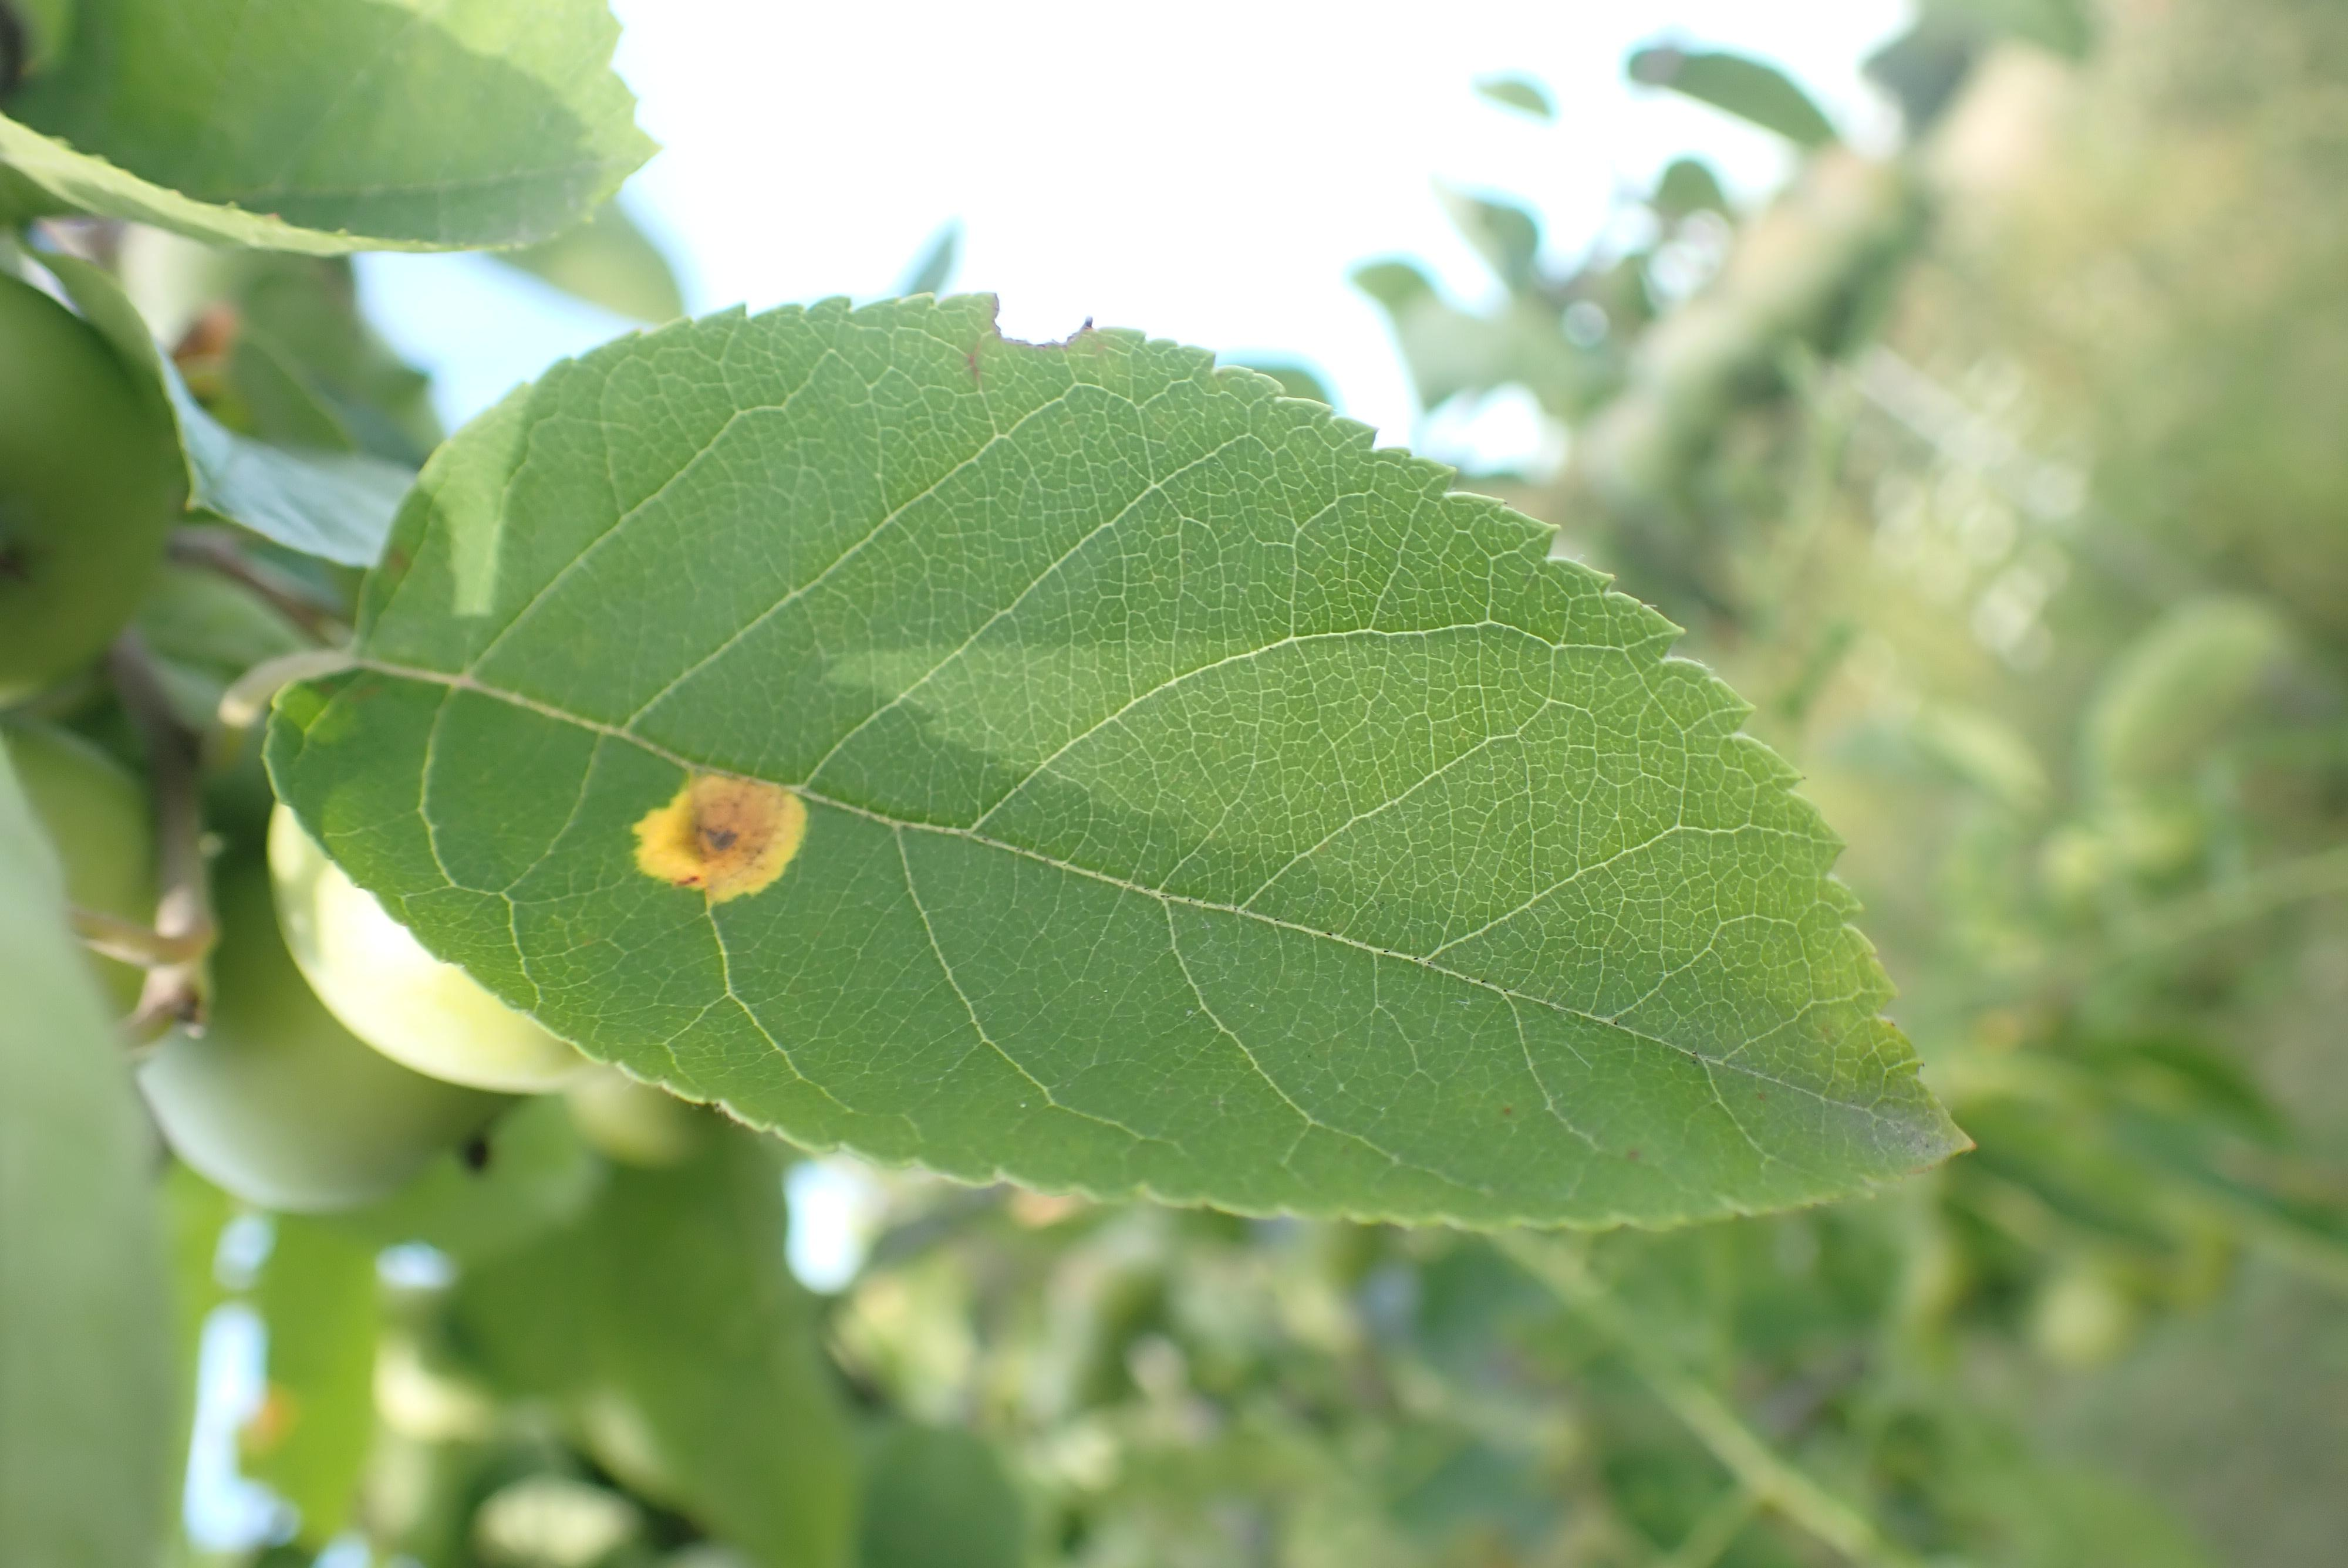

In [6]:
image_path = 'Database/Train/Rust/9583cadf870e7132.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [7]:
import tensorflow
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy as sparse_categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
train_generator = train_datagen.flow_from_directory('Database/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('Database/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1966 images belonging to 7 classes.
Found 118 images belonging to 7 classes.


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.compat.v1.keras.optimizers import Adam
import numpy as np

# Define your model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Add more layers as needed

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))  # Assuming 7 output classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the generators
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

# Access training history
print(history.history['accuracy'])
print(history.history['val_accuracy'])
print(history.history['loss'])
print(history.history['val_loss'])

# Calculate the average accuracy across all epochs
train_accuracy_avg = np.mean(history.history['accuracy'])
val_accuracy_avg = np.mean(history.history['val_accuracy'])

# Retrieve the accuracy of the last epoch
last_epoch_accuracy = history.history['accuracy'][-1]
last_epoch_val_accuracy = history.history['val_accuracy'][-1]

# Print the accuracy of the last epoch
print("Accuracy of Last Epoch (Training):", last_epoch_accuracy)
print("Accuracy of Last Epoch (Validation):", last_epoch_val_accuracy)

# Print the average accuracies
print("Average Training Accuracy:", train_accuracy_avg)
print("Average Validation Accuracy:", val_accuracy_avg)


Epoch 1/15
62/62 [==============================] - 111s 2s/step - loss: 5.7555 - accuracy: 0.3459 - val_loss: 1.3705 - val_accuracy: 0.4831
Epoch 2/15
62/62 [==============================] - 98s 2s/step - loss: 1.0362 - accuracy: 0.6155 - val_loss: 1.4652 - val_accuracy: 0.4915
Epoch 3/15
62/62 [==============================] - 101s 2s/step - loss: 0.8621 - accuracy: 0.6821 - val_loss: 1.3878 - val_accuracy: 0.5254
Epoch 4/15
62/62 [==============================] - 103s 2s/step - loss: 0.7766 - accuracy: 0.7096 - val_loss: 1.2278 - val_accuracy: 0.5847
Epoch 5/15
62/62 [==============================] - 102s 2s/step - loss: 0.7079 - accuracy: 0.7442 - val_loss: 1.0110 - val_accuracy: 0.6356
Epoch 6/15
62/62 [==============================] - 102s 2s/step - loss: 0.6732 - accuracy: 0.7625 - val_loss: 1.3892 - val_accuracy: 0.5763
Epoch 7/15
62/62 [==============================] - 102s 2s/step - loss: 0.6278 - accuracy: 0.7823 - val_loss: 1.0120 - val_accuracy: 0.6610
Epoch 8/15
62/

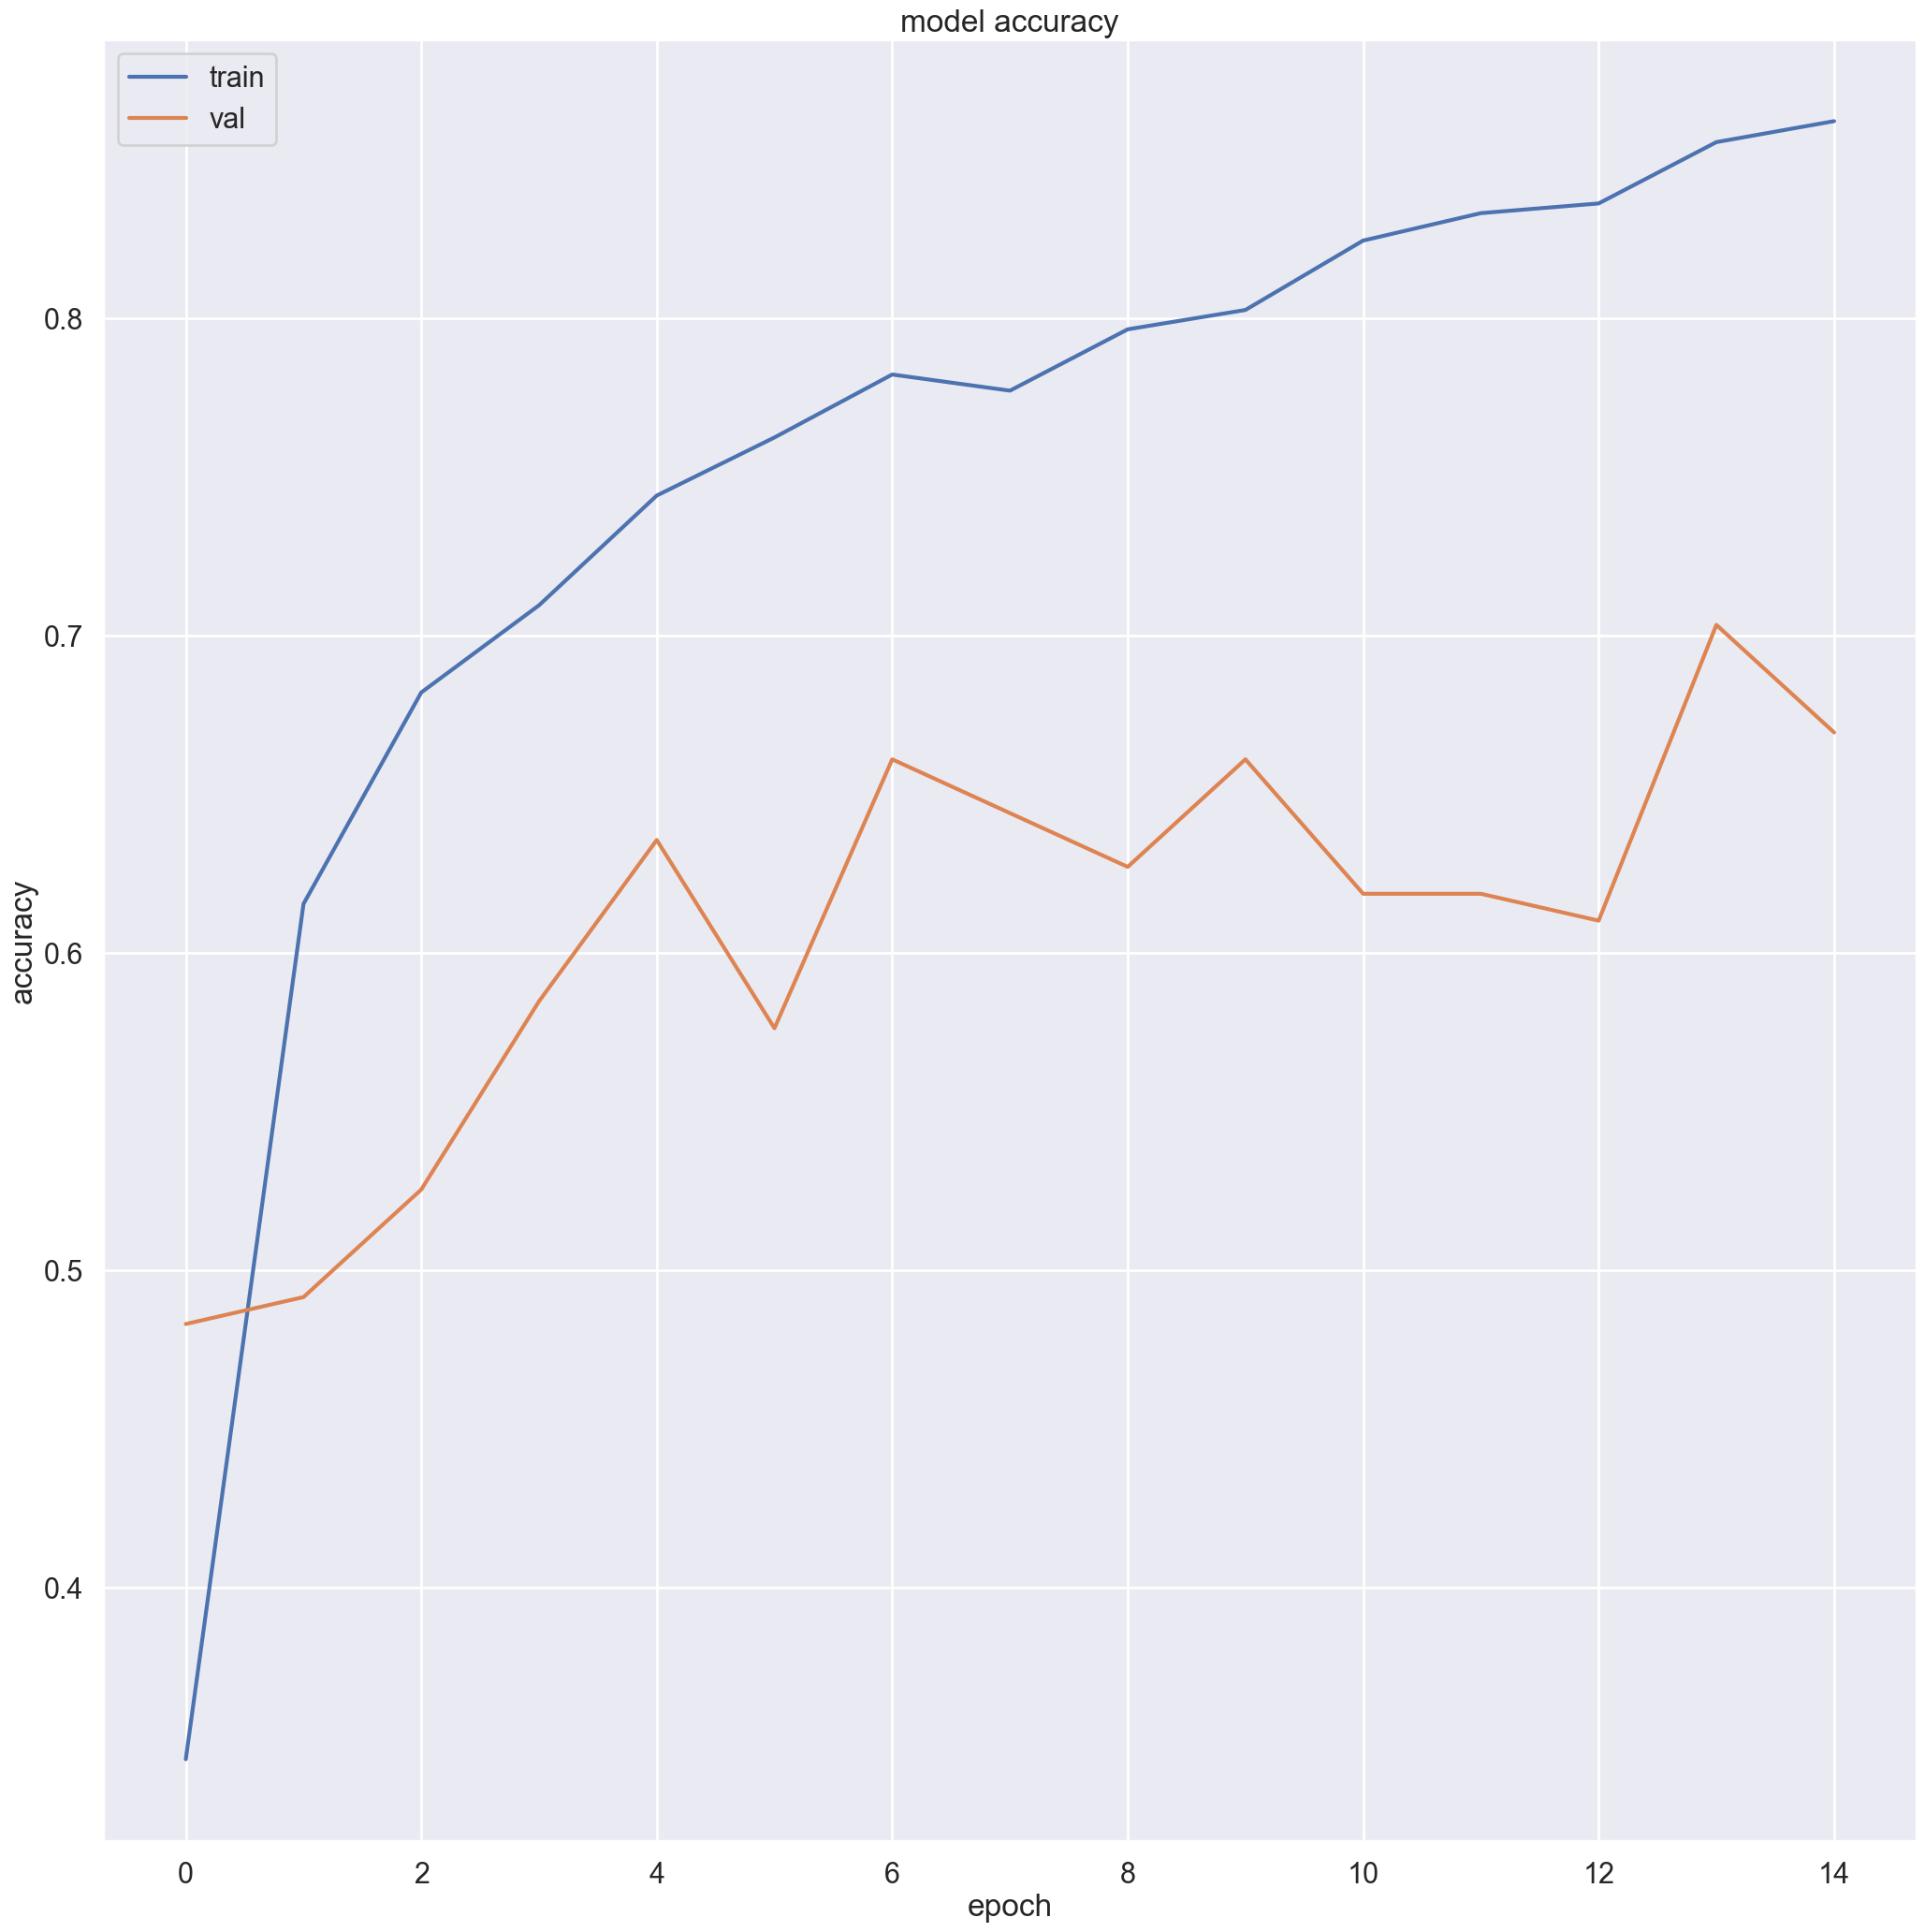

In [20]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model.save('model.keras')


In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('Database/Test/Wilting/bacterial-wilt-in-tomatoes.webp')

In [25]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 1s 720ms/step


array([9.8778994e-04, 6.4310501e-03, 6.6911027e-10, 2.6705643e-02,
       6.9404503e-15, 1.5599117e-05, 9.6585989e-01], dtype=float32)

In [26]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Bacterial_Infections',
 1: 'Gall_Disease',
 2: 'Healthy',
 3: 'Peach_Leaf_Curl',
 4: 'Powdery',
 5: 'Rust',
 6: 'Wilting'}

In [27]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Wilting
